Aakash Chaudhary (1943805)

CSC 478: Programming Machine Learning Applications 

Assignment -- 3

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules from the textbook code.

In [11]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

Linear Regression [Dataset: communities.zip]
For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

In [12]:
community = pd.read_csv("/Users/macbook/Downloads/communities/communities.csv", sep=',')
community.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [13]:
community.shape

(1994, 100)

In [14]:
community.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [7]:
community.columns

Index(['state', 'communityname', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
       'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'P

In [15]:
np.sum(np.array(pd.isnull(community)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
community["OtherPerCap"].unique()


array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [26]:
community.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
          

In [17]:
community.OtherPerCap = pd.to_numeric(community.OtherPerCap, errors='coerce') # coerce arg turns failures into NaN
community.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
          

In [18]:
community = community.dropna(axis=0)

In [19]:
y = np.array(community.ViolentCrimesPerPop)
x = np.array(community.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis = 1, inplace = False))

In [20]:
x.shape

(1993, 97)

In [21]:
y

array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

In [22]:
y.shape

(1993,)

In [23]:
x =np.array(x)
x = np.array([np.concatenate((v,[1])) for v in x])

In [24]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [25]:
w = standRegres(x, y)

In [26]:
print (w)

[[ 1.58394687e-01]
 [-3.02481869e-02]
 [ 2.12229063e-01]
 [-3.97237986e-02]
 [-1.27930326e-02]
 [ 6.36900639e-02]
 [ 1.22194419e-01]
 [-2.23124229e-01]
 [-1.42627637e-01]
 [ 5.64658800e-02]
 [-2.60230134e-01]
 [ 4.65037847e-02]
 [-2.00798143e-01]
 [-2.08126761e-01]
 [ 4.70792802e-02]
 [-1.73534979e-01]
 [ 5.82291674e-02]
 [ 1.05064444e-02]
 [-9.22106451e-02]
 [ 2.72565616e-01]
 [ 9.72713359e-02]
 [-3.26302914e-01]
 [-2.89431388e-02]
 [-3.59461641e-02]
 [ 2.28885702e-02]
 [ 4.31169895e-02]
 [ 3.76737976e-02]
 [ 1.19950473e-01]
 [-1.83693623e-01]
 [-9.47657739e-02]
 [ 5.55240764e-02]
 [ 1.07281673e-01]
 [ 3.24692051e-03]
 [ 2.34646790e-01]
 [-3.87649999e-02]
 [-1.03179240e-02]
 [ 4.87331629e-01]
 [ 2.23501778e-01]
 [ 1.95680279e-01]
 [-6.09603366e-01]
 [-1.37531328e-01]
 [ 5.78881584e-02]
 [-3.48705517e-01]
 [-3.63011027e-02]
 [ 3.18567061e-04]
 [ 5.73144283e-02]
 [-1.83223819e-01]
 [-1.56736510e-01]
 [ 1.30876568e-01]
 [-1.42989741e-01]
 [ 2.41003168e-02]
 [ 3.51231959e-02]
 [-7.5188094

In [58]:
# RMSE
yHat = x*w
yHatT = yHat.T
err = abs(yHatT - y)
total_error = np.dot(err,err.T)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train)

[[0.12869119]]


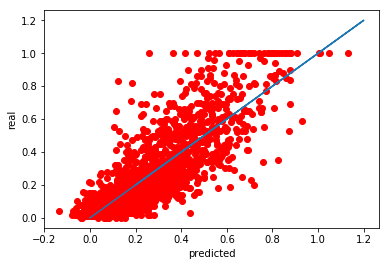

In [59]:
%matplotlib inline
pl.plot(yHat, y,'ro')
pl.plot([0,1.2,.2],[0,1.2,0.2])
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


In [60]:
from sklearn.model_selection import KFold
#10 Fold validation
n = 10
kf = KFold(n_splits=n)
xval_err = 0
for train,test in kf.split(x):
    w = standRegres(x, y) 
    xMat = np.mat(x)
    yMat = np.mat(y)
    yHat = xMat*w
    err = abs(yHat.T - y)
    xval_err += (np.dot(err,err.T))
       
rmse_10cv = np.sqrt(xval_err/len(yHat))
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 0.1287
RMSE on 10-fold CV: 0.4070


In [73]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/macbook/anaconda3/lib/python3.7/site-p

1
6
11
16
21
26
31
36
41
46
51


/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/macbook/anaconda3/lib/python3.7/site-p

56
61
66
71
76
81
86
91
96


/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/macbook/anaconda3/lib/python3.7/site-p

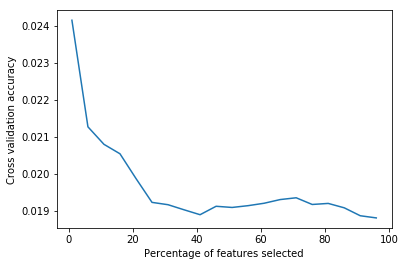

In [90]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(model_selection.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_squared_error'))    
    print (i), scores.mean()
    results = np.append(results, scores.mean())

##optimal_percentile = np.where(results == results.max())[0]
#print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n"
##optimal_num_features = int(percentiles[optimal_percentile]*len(cmtable_x.columns)/100)
#print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [94]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 45)
x_train_fs = fs.fit_transform(x_train, y_train)

for i in range(len(community_x.columns.values)):
    if fs.get_support()[i]:
        print (community_x.columns.values[i],'\t\t', fs.scores_[i])

population 		 229.59943872148278
racepctblack 		 992.1643850847794
racePctWhite 		 1304.8806138268162
numbUrban 		 223.61673819229668
medIncome 		 341.3095735160514
pctWWage 		 170.55412925955008
pctWInvInc 		 761.0568397801964
pctWPubAsst 		 783.224359214621
medFamInc 		 374.4346957111201
perCapInc 		 214.96942659482838
NumUnderPov 		 361.95940233901035
PctPopUnderPov 		 569.4858535418615
PctLess9thGrade 		 296.03204170555006
PctNotHSGrad 		 461.0577920924573
PctBSorMore 		 169.04178961922037
PctUnemployed 		 532.3616336751985
PctEmploy 		 196.3843559733518
MalePctDivorce 		 580.3420144382125
MalePctNevMarr 		 157.85414126446415
FemalePctDiv 		 693.8626992089273
TotalPctDiv 		 677.2286585312032
PctFam2Par 		 1596.8391699129954
PctKids2Par 		 1901.3001500117075
PctYoungKids2Par 		 1269.9824661860791
PctTeen2Par 		 1231.3207931534812
NumIlleg 		 399.8278427791827
PctIlleg 		 1856.8497011201273
PctImmigRec10 		 147.39387727343114
PctNotSpeakEnglWell 		 139.91354914140584
PctLargHouseFam 

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [95]:
from sklearn.metrics import mean_squared_error

In [97]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 45)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
pred = linreg.predict(x_test_fs)
linreg_err = mean_squared_error(y_test, pred)

print ("MAE of testing data is %0.8f" % linreg_err)

MAE of testing data is 0.01948184


/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [98]:
community2 = pd.read_csv("/Users/macbook/Downloads/communities/communities.csv", sep=',')
community2['OtherPerCap'] = community2['OtherPerCap'].convert_objects(convert_numeric = True)
OtherPerCap_mean = community2.OtherPerCap.mean()
community2.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

community2_x = community2.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1, inplace = False)
community2_y = community2['ViolentCrimesPerPop']

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [100]:
community2_x.shape

(1994, 97)

In [101]:
community2_y.shape

(1994,)

In [142]:
x = np.array(community2_x)
x = np.array([np.concatenate((v,[1])) for v in x])
y = np.array(community2_y)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [144]:
ridge = Ridge(fit_intercept=False, alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [145]:
p=ridge.predict(x)
err=p-y
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))
n=10
kf=KFold(n_splits=n)
xval_err=0
for train, test in kf.split(x):
    ridge.fit(x[train],y[train])
    p=ridge.predict(x[test])
    e=p-y[test]
    xval_err+=np.dot(e,e)
rmse_10cv=np.sqrt(xval_err/len(x))

print("Ridge Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

Ridge Regression
RMSE on training:  0.1299263146297031
RMSE on 10-fold CV:  0.13583793051924695


In [146]:
a=0.2
x=x

for name,met in[
        ('linear regression', LinearRegression()),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a)),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(x,y)
    p=met.predict(x)
    e=p-y
    total_error=np.dot(e,e)
    rmse_train=np.sqrt(total_error/len(p))
    n=10
    kf=KFold(n_splits=n)
    err=0
    for train, test in kf.split(x):
        met.fit(x[train],y[train])
        p=met.predict(x[test])
        e=p-y[test]
        err+=np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    print('Method: ', name)
    print('RMSE on training: ', rmse_train)
    print('RMSE on 10-fold CV: ', rmse_10cv)

Method:  linear regression
RMSE on training:  0.12888960779787603
RMSE on 10-fold CV:  0.1363330792326835
Method:  elastic-net
RMSE on training:  0.2329264729115651
RMSE on 10-fold CV:  0.23298906895659557
Method:  lasso
RMSE on training:  0.2329264729115651
RMSE on 10-fold CV:  0.23298906895659557
Method:  ridge
RMSE on training:  0.12913190045889222
RMSE on 10-fold CV:  0.1356619906463163


In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size = 0.2, random_state = 33)

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 200, 400)   
}

gs = GridSearchCV(sgdreg, parameters, verbose = 1, cv =5)

In [152]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1min 11s, sys: 2.2 s, total: 1min 13s
Wall time: 37.3 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   37.2s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6458774812901622)

In [160]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
x_s=scaler.transform(x)

sgdreg=SGDRegressor(penalty='l2', alpha=0.15)

# Calculate the RMSE for fitting a single model

sgdreg.fit(x,y)
p=sgdreg.predict(x)
err=p-y
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))

# RMSE using 10-fold cross-validation
n=10
kf=KFold(n_splits=n)
xval_err = 0
for train, test in kf.split(x):
    scaler=StandardScaler()
    scaler.fit(x[train])
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])
    sgdreg.fit(xtrain_s, y[train])
    p=sgdreg.predict(xtest_s)
    e=p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv=np.sqrt(xval_err/len(x))

print("Stochastic Gradient Descent Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

Stochastic Gradient Descent Regression
RMSE on training:  0.14667674599405836
RMSE on 10-fold CV:  0.13862352795549743
